在第14节，我们简单介绍了torchvision，他一方面提供了数据加载方面的工具，另一方面也提供了对PIL的支持以及相应数据集，他主要包含三方面功能：
1. models，提供深度学习中各种经典网络的网络结构及训练好的模型
2. datasets，提供常用的数据集加载，设计上都是继承`torch.utils.data.Dataset`
3. transforms，提供常用的PIL以及Tensor操作

对`PIL`的常用操作有：
1. Resieze，调整图片尺寸
2. CenterCrop、RandomCrop、RandomSizedCrop，裁剪图片
3. Pad，填充
4. Lambda，接受一个函数，该函数接受一个Image参数
4. ToTensor，将PIL的Image对象专为Tensor，会自动将[0,255]归一化至[-1,1]

对Tensor的常用操作有：
1. Normalize，标准化，即减均值，除以标准差
2. ToPILImage，将Tensor转为PIL的Image对象

In [6]:
from torchvision import models
from torch import nn

# 1. 加载预训练好的模型，如果不存在会自动下载
# 2. 预训练好的模型存在~/.torch/models/下面
resnet34 = models.resnet34(pretrained=True, num_classes=1000)

In [16]:
from torchvision import datasets
from torchvision import transforms
import torch as t

# 指定数据集，如果不存在则会下载
# 通过train=False获取测试集
dataset = datasets.MNIST('./data/', download=True, train=False, transform=transforms.ToTensor())

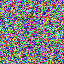

In [17]:
from torchvision import transforms
to_pil = transforms.ToPILImage()
to_pil(t.randn(3, 64, 64)) # 三通道，64x64

torchvision还提供了另外两个常用函数：
1. make_grid，可以将多张图片拼接在一个网格中
2. save_img，可以将Tensor保存为图片

In [18]:
len(dataset)

10000

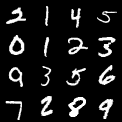

In [26]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
# 每一批数据中有batch_size张图片
dataloader = DataLoader(dataset, shuffle=True, batch_size=16)
dataiter = iter(dataloader)
img = make_grid(next(dataiter)[0], 4)
to_pil(img)

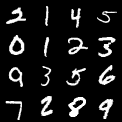

In [27]:
from PIL import Image
save_image(img, './data/a.png')
Image.open('./data/a.png')